In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
# genrators ---> to divide in small batch

train_ds = keras.utils.image_dataset_from_directory(
    directory = "casting_data/train/", 
    labels = "inferred",
    label_mode="int" ,
    batch_size = 32,
    image_size = (256 , 256)
    
    
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "casting_data/test/",
    labels = "inferred",
    label_mode="int", 
    batch_size = 32,
    image_size = (256 , 256)
    
    
)

Found 6635 files belonging to 2 classes.
Found 715 files belonging to 2 classes.


In [3]:
# NOrmalization
def process(image , label):
    image = tf.cast(image/255. , tf.float32)
    return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# Create CNN Model for Img Recong
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = "valid" , activation = "relu" , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid"))

model.add(Conv2D(64,kernel_size = (3,3),padding = "valid" , activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid"))

model.add(Conv2D(128,kernel_size = (3,3),padding = "valid" , activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = "valid"))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation = "sigmoid"))

C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output for 2 classes
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Fit the model
history = model.fit(train_ds, epochs= 3 , validation_data=validation_ds)

Epoch 1/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 152s 703ms/step - accuracy: 0.6633 - loss: 2.1370 - val_accuracy: 0.8545 - val_loss: 0.3223
Epoch 2/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 132s 631ms/step - accuracy: 0.9042 - loss: 0.2503 - val_accuracy: 0.9538 - val_loss: 0.1510
Epoch 3/3
208/208 ━━━━━━━━━━━━━━━━━━━━ 128s 614ms/step - accuracy: 0.9742 - loss: 0.0959 - val_accuracy: 0.9706 - val_loss: 0.0846


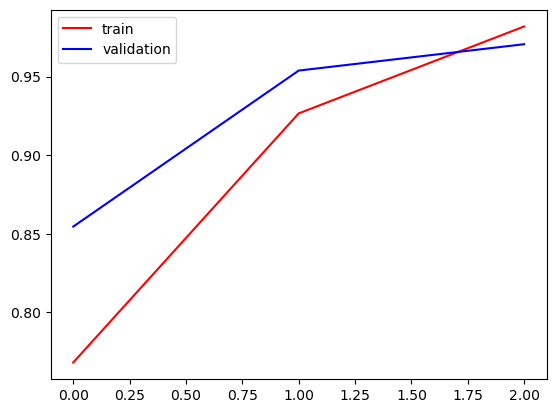

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"] , color = "red" , label = "train")
plt.plot(history.history["val_accuracy"],color = "blue" , label = "validation")
plt.legend()
plt.show()

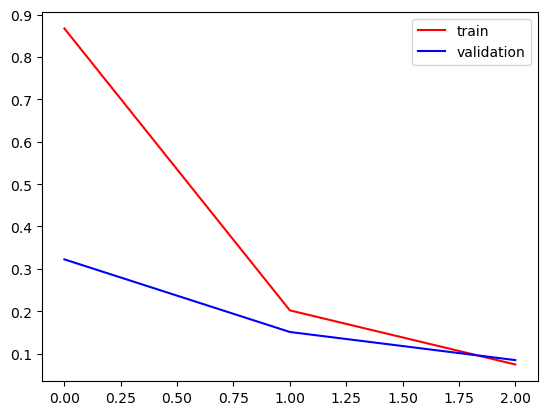

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"] , color = "red" , label = "train")
plt.plot(history.history["val_loss"],color = "blue" , label = "validation")
plt.legend()
plt.show()

In [11]:
import cv2

In [12]:
test_img = cv2.imread("Def.png")

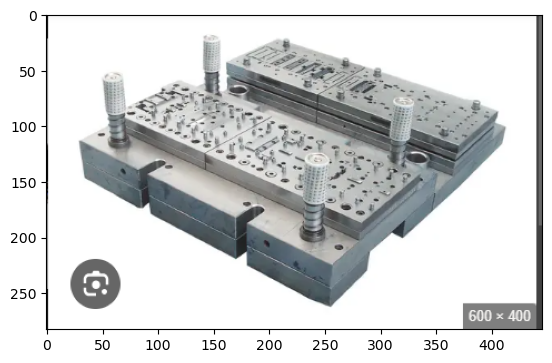

In [13]:
test_input = plt.imshow(test_img)

In [14]:
test_img.shape

(283, 446, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


array([[1.]], dtype=float32)

In [18]:
test_img = cv2.imread("Defect.jpeg")

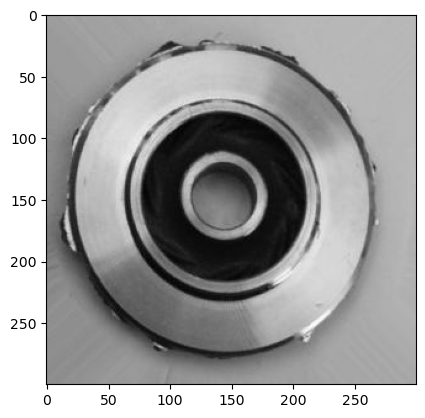

In [19]:
test_input = plt.imshow(test_img)

In [20]:
test_img.shape

(300, 300, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.]], dtype=float32)

# For 

# Defectve --------> 0
# UnDefective -----> 1

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example true labels and predicted labels
true_labels = np.array([1, 0])  # Actual class labels (1 = positive, 0 = negative)
predicted_labels = np.array([1, 0,])  # Model predictions

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[1 0]
 [0 1]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
